### `データモデル評価、ハイパーパラメータ、クラスタリングのまとめ`

| No.| ライブラリ | モジュール | クラス | 関数 | import  | 処理区分 | 説明 |
| ----| ----------- | ------------ | ------- | -------- |  :-------  | -----------| ------|
| 1| sklearn | metrics | - | classification_report(実績、予測) | from sklearn.metrics import classification_report | モデルの評価 | 予測結果の適合率、再現率、F値を出力|
| 2| sklearn | model_selection | - | cross_val_score(isvc, X, y, 交差件数,評価指標') | from sklearn.model_selection import cross_val_score | モデルの評価 | 層化K分割交差検証を実行|
| 3| sklearn | metrics | - | roc_auc_score() | from sklearn.metrics import roc_auc_score | モデルの評価 | AUC計算|
| 4| sklearn | model_selection | GridSearchCV(i決定木, 深さ配列, 交差件数) | best_params_<br>best_estimator_ | from sklearn.model_selection import GridSearchCV | ハイパーパラメータ | K分割交差検証を実行し、最適パラメタを確認|
| 5| sklearn | cluster | KMeans(クラスタ数, init = 'random', 交差数,random_state=123) | fit_predict() | from sklearn.cluster import KMeans |クラスタリング |k-meansクラスタリングを実行|
| 6| sklearn | cluster | AgglomerativeClustering(クラスタ数,ユーグリッド, linkage) | fit_predict() | from sklearn.cluster import AgglomerativeClustering |クラスタリング |凝集型の階層クラスタリングを実行|
| 7| scipy | cluster | hierarchy | dendrogram() | from scipy.cluster.hierarchy import dendrogram |クラスタリング |樹形図を描画|

## 4.4.5 モデルの評価

### 分類の代表的な指標大きく２つの観点
* カテゴリの分類制度
* 予測確率の正確さ

### １、カテゴリの分類制度

### 混同配列(confusion matrix)

| | ＾ 　　　　　　　　　　　　| 実績 | 実績 |
| :---| :--- | :--- |: --- |
||  ＾ 　　　　　　　　　　　　| 正例 | 負例 |
|予測 |正例と予測| TP(正例と予測して実際は正例)|  FP(正例と予測したが実際は負例) |
|予測| 負例と予測| FN(負例と予測したが実際は正例 | TN(負例と予測して実際は負例) |


### 評価指標
* 適合率(precision)
 * 正例と予測したデータのうち、実際に正例の割合を表す
 * 適合率 = TP/(TP+FP)
* 再現率(recall)
 * 実際の正例のうち、正例と予測したものの割合を表す
 * 再現率 = TP/(TP+FN) 
* F値(F-Value)
 * 適合率と再現率の調和平均
 * F値= 2 ｘ 適合率 ｘ 再現率/(適合率+ 再現率)
* 正解率(accuracy)
 * 予測と実績の一致したものの割合を表す
 * 正解率  = (TP+TN)/(TP + FN + FP + TN)

In [7]:
from sklearn.datasets import  load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Irisデータセットを読み込む
iris =load_iris()
X, y = iris.data[:100, :],iris.target[:100]

# 学習データセット、テストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# SVMのインスタンス化
svc =SVC()

# SVMで学習
svc.fit(X_train, y_train)
#テストデータセットの予測
y_pred = svc.predict(X_test)



In [8]:
from sklearn.metrics import classification_report

# 適合率、再現率、F値を出力
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        30



#### 説明:precision = 適合率、recall=再現率、 f1-score= F値、   support=データの件数、0:クラス0、１:クラス1

### 交差検査
* データセットを学習用データセット、テスト用データセットに分割処理を複数繰り返し、モデルの構築と評価を複数回行うお方法
* K 分割交差検証(stratified k-fold crosscalidation)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# SVMをインスタンス化
svc = SVC()

# 10分割の交差検証を実行、cv：分割数、scoring=評価指標
cross_val_score(svc, X, y, cv = 10, scoring = 'precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### ２、予測確率の正確さ

### 評価指標
* ROC曲線(Receiver Operating Characteristic)
　* 基本考え方
  * 1.確率の高い順でデータを並べる
  * 2.真陽性率と偽陽性率を計算
  * 3.横軸に偽陽性率、縦軸に真陽性率をしてプロット
* AUC(Area Under the Curve)
 * 1.ROC曲線の下部の図形は横軸方向を幅、縦軸方向を長さの長方形にする
 * 2.全ての長方形の面積を計算して合計を取る
 * 3.１に近くほど、確率が高いサンプルが正例、確率が低いサンプルが負例
 * 4.0.5に近くほど、確率により正例と負例を区別できず

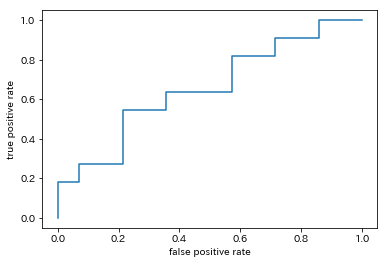

In [15]:
# ROC曲線
import numpy  as np
import matplotlib.pyplot as plt

# 偽陽性率と真陽性率を算出
fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11

 # ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [18]:
from sklearn.metrics import roc_curve
# 各ユーザが退会したかどうかを表すラベル
labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])

#　各ユーザの予測退会率
probs = np.array([0.98,0.95,0.9,0.87,0.85,0.8,0.75,0.71,0.63,0.55,0.51,0.47,0.43,
                  0.38,0.35,0.31,0.28,0.24,0.22,0.19,0.15,0.12,0.08,0.04,0.01])

#　偽陽性率、真陽性率、しきい値を算出
fpr,tpr,threshold = roc_curve(labels,probs)
print('偽陽性率：',fpr)
print('真陽性率：',tpr)

偽陽性率： [0.         0.         0.07142857 0.07142857 0.21428571 0.21428571
 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571 0.71428571
 0.85714286 0.85714286 1.        ]
真陽性率： [0.09090909 0.18181818 0.18181818 0.27272727 0.27272727 0.54545455
 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182 0.90909091
 0.90909091 1.         1.        ]


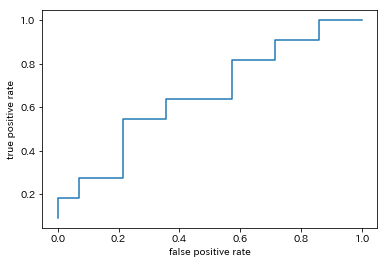

In [19]:
 # ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
# AUCの算出
roc_auc_score(labels,probs)

0.6558441558441558

## 4.4.6 ハイパーパラメータの最適化

### 木の深さ、ランダムフォレストの決定木の数などユーザが設定するparameter
* グリットサーチ
* ランダムサーチ

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Irisデータセットをロード
iris = load_iris()
X, y = iris.data,iris.target

# 学習データセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 決定木をインスタンス化
clf = DecisionTreeClassifier()
param_grid = {'max_depth':[3,4,5]}

# １０分割の交差検証を実行
cv = GridSearchCV(clf, param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [9]:
# 最適な深さを確認
cv.best_params_

{'max_depth': 4}

In [7]:
# 最適なモデルを確認
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
# 推定された最適なモデルを用いて予測を行う
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## 4.4.7 クラスタリング

### 教師なし学習、ある基準でデータ間の類似性を計算、データをグループにまとめる
* k-means
 * 1.ランダムで各データの割り当てたクラスタの中心をとる
 * 2.各データをもっとも近い中心のラベルを付ける
 * 3.各クラスタの中心を新たな中心にする
 * 4.クラスタ中心が収束まで上記1.と2.を繰り返す
* 階層的クラスタリング
 * 大きく分けて凝集型と分割型
 * 凝集型 -　最初にデータにデータを小さなクラスにまとめて、順次に似でいるクラスをさらにまとめる
 * 分割型 - 最初は大きく１のクラスにまとめてから分割

In [33]:
from sklearn.datasets import load_iris

# Irisデータセットを読み込む
iris = load_iris()
data = iris.data

# 1,3列目を抽出
X = data[:100,[0,2]]


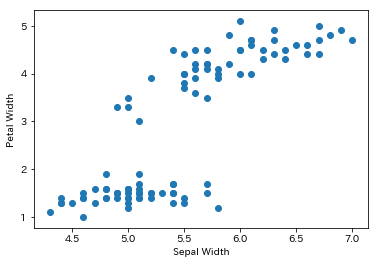

In [35]:
import matplotlib.pyplot as plt

# 散布図を描画
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [37]:
from sklearn.cluster import KMeans

# クラス数を３とするKMeansのインスタンス化
km =KMeans(n_clusters=3, init = 'random', n_init = 10,random_state=123)

# KMeansを実行
y_km = km.fit_predict(X)

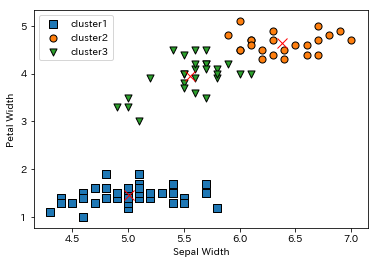

In [38]:
import numpy as np

fig, ax = plt.subplots()
# 散布図(クラスタ1)
ax.scatter(X[y_km == 0, 0],X[y_km == 0,1],s=50,edgecolor='black',marker='s',label='cluster1')
# クラスタ中心(クラスタ１)
ax.plot(np.mean(X[y_km==0,0]),np.mean(X[y_km == 0,1]),marker='x', markersize=10,color='red')

# 散布図(クラスタ2)
ax.scatter(X[y_km == 1, 0],X[y_km == 1,1],s=50,edgecolor='black',marker='o',label='cluster2')
# クラスタ中心(クラスタ2)
ax.plot(np.mean(X[y_km==1,0]),np.mean(X[y_km == 1,1]),marker='x', markersize=10,color='red')

# 散布図(クラスタ3)
ax.scatter(X[y_km == 2, 0],X[y_km == 2,1],s=50,edgecolor='black',marker='v',label='cluster3')
# クラスタ中心(クラスタ3)
ax.plot(np.mean(X[y_km==2,0]),np.mean(X[y_km == 2,1]),marker='x', markersize=10,color='red')
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering

#凝集型の階層クラスタリングのインスタンス化を生成
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

# クラスタリングを実行しｍ各クラスのクラスタ番号を取得
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

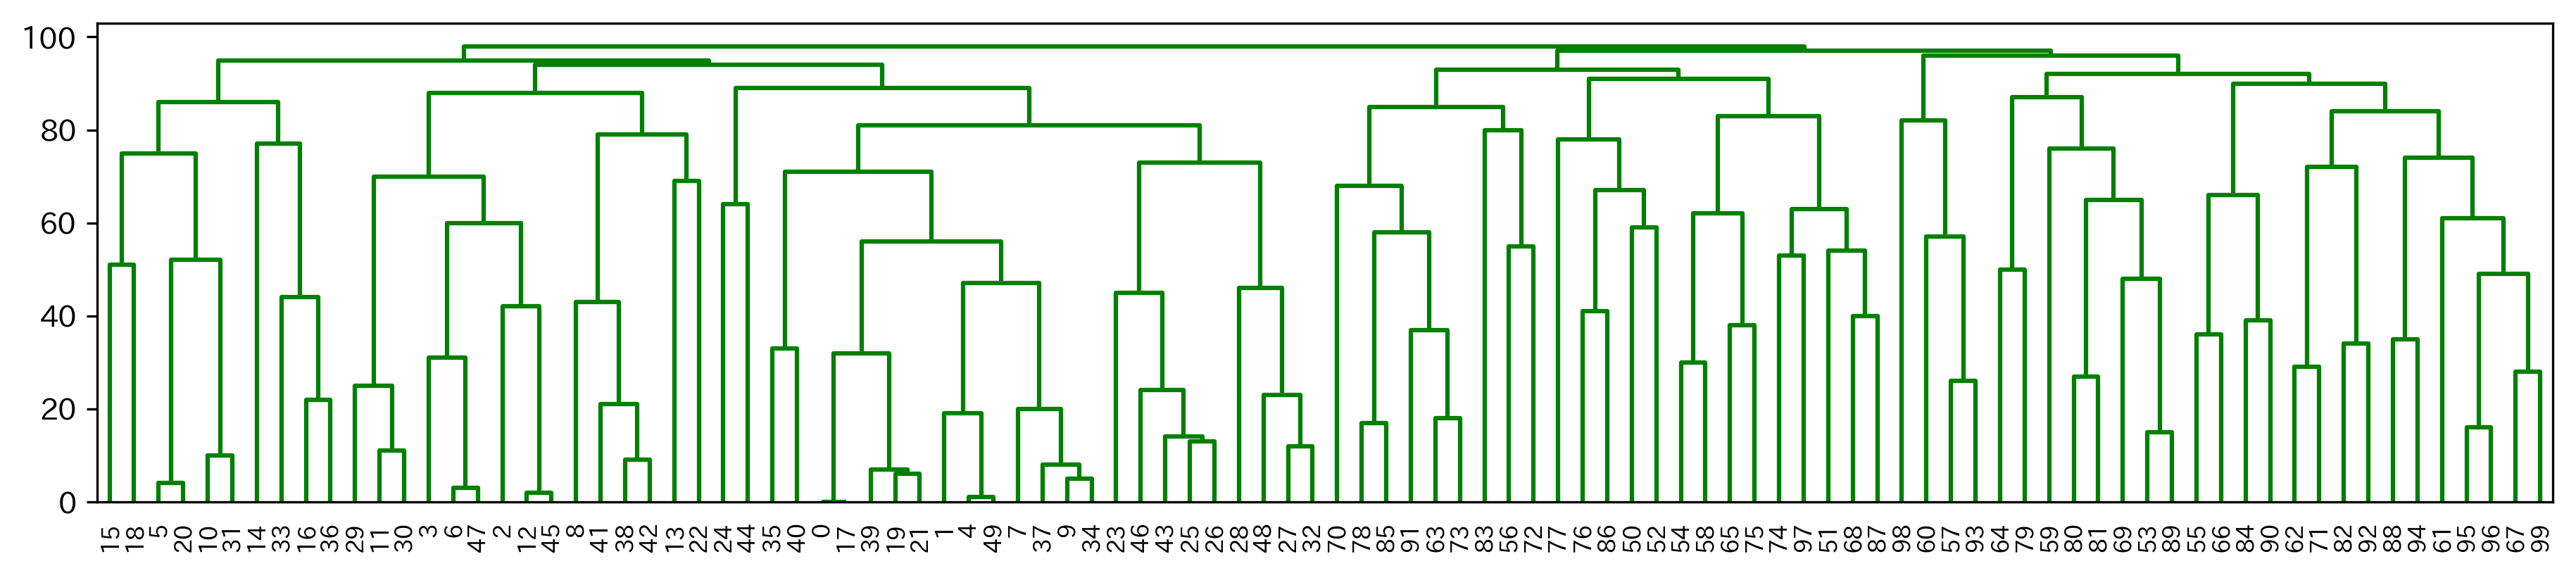

In [44]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

# 子クラスとの関係を抽出
children =ac.children_
# クラス間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの監査番号
no_of_observations = np.arange(2,children.shape[0]+2)
# 子クラスタ、クラスタ間の距離、監査番号を列向に結合
linkage_matrix = np.hstack((children,distance[:, np.newaxis],no_of_observations[:, np.newaxis])).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15,3),dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8,color_threshold=np.inf)
plt.show()